In [1]:
#We are going to predict who is going to survive, based on the Titanic dataset
#Since it is a yes no quesiton we will use classification
#read,examine,select usefull columns,EDA and fill empty columns
#convert objects that can be converted to float or integer
#decide on x and y, tarin the model

In [4]:
import pandas as pd
pd.set_option("display.max_columns",55)

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv("ttrain.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df2=pd.read_csv("ttest.csv")

In [6]:
df2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
df=pd.concat([df,df2])

In [8]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
df["Age"].value_counts()

Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64

In [13]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.')

In [14]:
df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [15]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Capt','Jonkheer'],'Mr')

In [16]:
df["Title"].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [17]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [18]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [19]:
df["Fare"].value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [20]:
df["Fare"].mean()

33.29547928134557

In [21]:
df['Fare']=df['Fare'].fillna(df["Fare"].mode()[0])

In [22]:
df["Cabin"].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [23]:
print(df.index.duplicated().sum())

418


In [24]:
df = df.reset_index(drop=True)

<Axes: xlabel='Embarked', ylabel='count'>

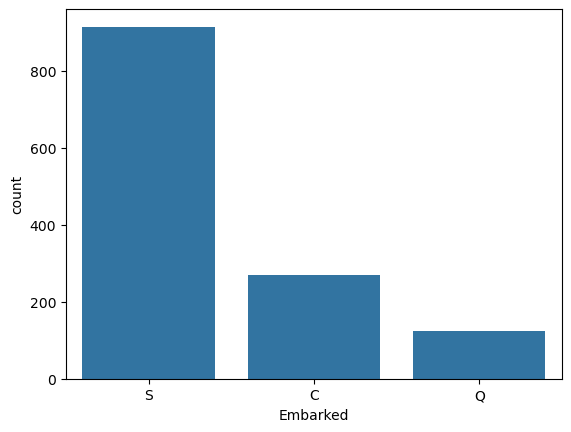

In [25]:
sns.countplot(x=df["Embarked"])

In [26]:
df['Embarked']=df['Embarked'].fillna(df["Embarked"].mode()[0])

In [27]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [28]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
train=df[:891]
test=df[891:]

In [31]:
x=train.drop(['Survived'],axis=1)
y=train[['Survived']]

In [32]:
g=GaussianNB()
b=BernoulliNB()
r=RandomForestClassifier()
gr= GradientBoostingClassifier()

In [33]:
test1=test.drop(['Survived'],axis=1)

In [34]:
test1

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
891,3,34.5,0,0,7.8292,True,True,False,False,True,False
892,3,47.0,1,0,7.0000,False,False,True,False,False,True
893,2,62.0,0,0,9.6875,True,True,False,False,True,False
894,3,27.0,0,0,8.6625,True,False,True,False,True,False
895,3,22.0,1,1,12.2875,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,30.0,0,0,8.0500,True,False,True,False,True,False
1305,1,39.0,0,0,108.9000,False,False,False,False,False,True
1306,3,38.5,0,0,7.2500,True,False,True,False,True,False
1307,3,30.0,0,0,8.0500,True,False,True,False,True,False


In [35]:
g.fit(x,y)

GaussianNB()

In [36]:
test1

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
891,3,34.5,0,0,7.8292,True,True,False,False,True,False
892,3,47.0,1,0,7.0000,False,False,True,False,False,True
893,2,62.0,0,0,9.6875,True,True,False,False,True,False
894,3,27.0,0,0,8.6625,True,False,True,False,True,False
895,3,22.0,1,1,12.2875,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,30.0,0,0,8.0500,True,False,True,False,True,False
1305,1,39.0,0,0,108.9000,False,False,False,False,False,True
1306,3,38.5,0,0,7.2500,True,False,True,False,True,False
1307,3,30.0,0,0,8.0500,True,False,True,False,True,False


In [37]:
pred=g.predict(test1)

In [38]:
pred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [39]:
pred1=pd.DataFrame()

In [40]:
pred1["PassengerId"]=df2["PassengerId"]

In [41]:
pred1["Survived"]=pred

In [88]:
pred1["Survived"]=pred1["Survived"].astype("int32")

In [90]:
pred1.to_csv("Titanic_pred1.csv", index=False)

In [92]:
test4=test.drop(['Survived'],axis=1)

In [96]:
gr.fit(x,y)

GradientBoostingClassifier()

In [98]:
pred4=g.predict(test1)

In [100]:
sol4=pd.DataFrame()
sol4["PassengerId"]=df2["PassengerId"]
sol4['Survived']=pred4

In [102]:
sol4

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [104]:
sol4["Survived"]=sol4["Survived"].astype("int32")

In [106]:
sol4.to_csv("Titanic_sol4.csv", index=False)

In [ ]:
loss_f.plot()